In [290]:
from ibm_watson import ToneAnalyzerV3
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [409]:
#load in dataset
df = pd.read_csv('AllBooks_baseline_DTM_Labelled.csv')
df.rename(columns={'Unnamed: 0': 'Books'}, inplace=True)
words = np.array(df.columns[1:])

In [410]:
df.drop(columns=['s'], inplace=True)

In [294]:
df.head()

,Books,foolishness,hath,wholesome,takest,feelings,anger,vaivaswata,matrix,kindled,...,erred,thinkest,modern,reigned,sparingly,visual,thoughts,illumines,attire,explains
0,Buddhism_Ch1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Buddhism_Ch2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Buddhism_Ch3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Buddhism_Ch4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Buddhism_Ch5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [411]:
#split data by book
buddhism = df[df['Books'].str.contains('Buddhism')]
taoteching = df[df['Books'].str.contains('TaoTeChing')]
upanishad = df[df['Books'].str.contains('Upanishad')]
yogasutra = df[df['Books'].str.contains('YogaSutra')]
proverb = df[df['Books'].str.contains('Proverb')]
eccleasiasticus = df[df['Books'].str.contains('Eccleasiasticus')]
wisdom = df[df['Books'].str.contains('Wisdom')]

In [296]:
buddhism.head()

,Books,foolishness,hath,wholesome,takest,feelings,anger,vaivaswata,matrix,kindled,...,erred,thinkest,modern,reigned,sparingly,visual,thoughts,illumines,attire,explains
0,Buddhism_Ch1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Buddhism_Ch2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Buddhism_Ch3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Buddhism_Ch4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Buddhism_Ch5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [412]:
#get the sum of all word counts for each book
buddhism_combined = pd.DataFrame(buddhism.sum()[1:], columns=['Count'])
taoteching_combined = pd.DataFrame(taoteching.sum()[1:], columns=['Count'])
upanishad_combined = pd.DataFrame(upanishad.sum()[1:], columns=['Count'])
yogasutra_combined = pd.DataFrame(yogasutra.sum()[1:], columns=['Count'])
proverb_combined = pd.DataFrame(proverb.sum()[1:], columns=['Count'])
eccleasiasticus_combined = pd.DataFrame(eccleasiasticus.sum()[1:], columns=['Count'])
wisdom_combined = pd.DataFrame(wisdom.sum()[1:], columns=['Count'])
words_combined = pd.DataFrame(df.sum()[1:], columns=['Count'])

In [297]:
buddhism_combined.head()

,Count
foolishness,0
hath,0
wholesome,0
takest,0
feelings,19


In [413]:
#flatten the dataframes in order to combine them
bud_flat = buddhism_combined.T.rename(index={'Count': 'Buddhism'})
tao_flat = taoteching_combined.T.rename(index={'Count': 'TaoTeChing'})
up_flat = upanishad_combined.T.rename(index={'Count': 'Upanishad'})
yoga_flat = yogasutra_combined.T.rename(index={'Count': 'YogaSutra'})
proverb_flat = proverb_combined.T.rename(index={'Count': 'Proverb'})
eccl_flat = eccleasiasticus_combined.T.rename(index={'Count': 'Eccleasiasticus'})
wisdom_flat = wisdom_combined.T.rename(index={'Count': 'Wisdom'})

In [300]:
bud_flat.head()

,foolishness,hath,wholesome,takest,feelings,anger,vaivaswata,matrix,kindled,convict,...,erred,thinkest,modern,reigned,sparingly,visual,thoughts,illumines,attire,explains
Buddhism,0,0,0,0,19,0,0,0,0,0,...,0,0,0,0,0,0,9,0,0,0


In [414]:
#combine the flattened dataframes
df_flat = pd.concat([bud_flat, tao_flat, up_flat, yoga_flat, proverb_flat, eccl_flat, wisdom_flat])

In [302]:
df_flat.head()

,foolishness,hath,wholesome,takest,feelings,anger,vaivaswata,matrix,kindled,convict,...,erred,thinkest,modern,reigned,sparingly,visual,thoughts,illumines,attire,explains
Buddhism,0,0,0,0,19,0,0,0,0,0,...,0,0,0,0,0,0,9,0,0,0
TaoTeChing,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Upanishad,0,0,0,0,0,3,1,0,1,0,...,0,3,0,0,0,0,2,1,0,1
YogaSutra,0,2,1,0,0,0,0,1,0,0,...,0,0,2,0,0,1,14,4,0,1
Proverb,2,65,0,0,0,11,0,0,0,0,...,0,0,0,0,0,0,8,0,1,0


In [415]:
#standardize the word counts for better analysis
df_norm = pd.DataFrame()
for i in range(7):
    temp = (df_flat.iloc[i].values - np.mean(df_flat.iloc[i].values)) / np.std(df_flat.iloc[i].values)
    df_norm = pd.concat([df_norm, pd.DataFrame(temp, index=df_flat.columns, columns=[df_flat.index[i]]).T])

In [305]:
df_norm.head()

,foolishness,hath,wholesome,takest,feelings,anger,vaivaswata,matrix,kindled,convict,...,erred,thinkest,modern,reigned,sparingly,visual,thoughts,illumines,attire,explains
Buddhism,0,0,0,0,4.5396,0,0,0,0,0,...,0,0,0,0,0,0,2.15034,0,0,0
TaoTeChing,0,0,0,0,0,0.425633,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Upanishad,0,0,0,0,0,0.885231,0.295077,0,0.295077,0,...,0,0.885231,0,0,0,0,0.590154,0.295077,0,0.295077
YogaSutra,-0.149241,0.149241,0,-0.149241,-0.149241,-0.149241,-0.149241,0,-0.149241,-0.149241,...,-0.149241,-0.149241,0.149241,-0.149241,-0.149241,0,1.94014,0.447724,-0.149241,0
Proverb,0.320025,10.4008,0,0,0,1.76014,0,0,0,0,...,0,0,0,0,0,0,1.2801,0,0.160013,0


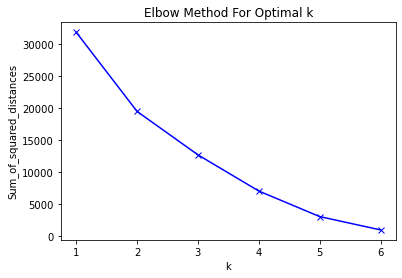

In [306]:
#prepare data for clustering algorithm
X = df_norm

#use elbow method to optimize number of clusters
Sum_of_squared_distances = []
K = range(1,7)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [307]:
#run pca on data for dimensionality reduction
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X)

#run kmeans clustering algorithm on data
kmeans = KMeans(n_clusters=3, random_state=42).fit(reduced_data)
clusters = pd.DataFrame(index=df_norm.index, data=kmeans.labels_, columns=['Category'])

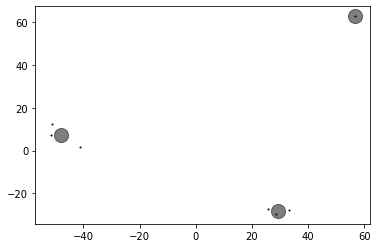

In [308]:
#plot books and clusters
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.show()

In [416]:
#find top 20 most common words in each book
top20 = []
for i in range(7):
    top20.append(df_norm.iloc[i].sort_values(ascending=False)[:20])

In [312]:
top20[0]

right            30.5825
feeling          20.3087
one              17.9195
stress           17.6805
body             17.4416
monk             17.2027
mind             16.9638
remains          15.0523
cessation        14.8134
called           14.8134
mental           13.8577
discerns         13.8577
focused          13.3799
way              13.1409
consciousness    11.2295
noble            10.9906
property         10.2738
qualities        10.0349
concentration    9.55705
form             9.31812
Name: Buddhism, dtype: object

In [417]:
#create dataframe of top 20 words for each book
top20_df = pd.DataFrame()
for book in top20:
    top20_df = pd.concat([top20_df, pd.DataFrame(book.index, columns=[book.name])], axis=1)

In [418]:
top20_df

,Buddhism,TaoTeChing,Upanishad,YogaSutra,Proverb,Eccleasiasticus,Wisdom
0,right,tao,one,spiritual,shall,shall,shall
1,feeling,things,self,man,man,thy,things
2,one,one,mind,life,thy,man,thy
3,stress,men,brahman,consciousness,thou,thou,god
4,body,great,man,power,wicked,god,thou
5,monk,therefore,death,one,lord,hath,wisdom
6,mind,heaven,knowledge,mind,wise,thee,man
7,remains,would,know,soul,hath,lord,upon
8,called,thus,must,things,heart,things,made
9,cessation,without,nachiketas,self,thee,upon,hath


In [419]:
#find top 20 words in all books combined
temp = (words_combined.values - np.mean(words_combined.values)) / np.std(words_combined.values)
words_norm = pd.DataFrame(temp, index=words_combined.index, columns=['z'])
pd.DataFrame(words_norm.sort_values(by=['z'], ascending=False)[:20].index, columns=['Words'])

,Words
0,shall
1,man
2,thy
3,one
4,things
5,thou
6,god
7,life
8,hath
9,spiritual


In [323]:
#look at the top 20 words for only the old testament books
oldtest_top20 = top20_df[['Proverb', 'Eccleasiasticus', 'Wisdom']]
oldtest_top20.head()

,Proverb,Eccleasiasticus,Wisdom
0,shall,shall,shall
1,man,thy,things
2,thy,man,thy
3,thou,thou,god
4,wicked,god,thou


In [320]:
#create dataframe of all old testmanet books
#drop words that are not in any of the old testament books
oldtest = pd.concat([proverb, eccleasiasticus, wisdom])
oldtest = oldtest.set_index(oldtest['Books'])
oldtest.drop(columns=['Books'], inplace=True)
oldtest_clean = oldtest.drop(columns=words[np.where(oldtest.sum() == 0)])

In [322]:
oldtest_clean.head()

,foolishness,hath,wholesome,takest,anger,kindled,convict,diadem,open,expecteth,...,admireth,lifeless,stout,taketh,kettle,erred,reigned,sparingly,thoughts,attire
Books,,,,,,,,,,,,,,,,,,,,,
BookOfProverb_Ch1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BookOfProverb_Ch2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BookOfProverb_Ch3,0,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BookOfProverb_Ch4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BookOfProverb_Ch5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [327]:
#standardize the old testament data
oldtest_norm = pd.DataFrame()
for i in range(len(oldtest)):
    temp = (oldtest_clean.iloc[i].values - np.mean(oldtest_clean.iloc[i].values)) / np.std(oldtest_clean.iloc[i].values)
    oldtest_norm = pd.concat([oldtest_norm, pd.DataFrame(temp, index=oldtest_clean.columns, columns=[oldtest_clean.iloc[i].name]).T])

In [328]:
oldtest_norm.head()

,foolishness,hath,wholesome,takest,anger,kindled,convict,diadem,open,expecteth,...,admireth,lifeless,stout,taketh,kettle,erred,reigned,sparingly,thoughts,attire
BookOfProverb_Ch1,-0.131811,-0.131811,-0.131811,-0.131811,-0.131811,-0.131811,-0.131811,-0.131811,-0.131811,-0.131811,...,-0.131811,-0.131811,-0.131811,-0.131811,-0.131811,-0.131811,-0.131811,-0.131811,-0.131811,-0.131811
BookOfProverb_Ch2,-0.119582,2.935389,-0.119582,-0.119582,-0.119582,-0.119582,-0.119582,-0.119582,-0.119582,-0.119582,...,-0.119582,-0.119582,-0.119582,-0.119582,-0.119582,-0.119582,-0.119582,-0.119582,-0.119582,-0.119582
BookOfProverb_Ch3,-0.117459,7.356880,-0.117459,-0.117459,-0.117459,-0.117459,-0.117459,-0.117459,-0.117459,-0.117459,...,-0.117459,-0.117459,-0.117459,-0.117459,-0.117459,-0.117459,-0.117459,-0.117459,-0.117459,-0.117459
BookOfProverb_Ch4,-0.124461,-0.124461,-0.124461,-0.124461,-0.124461,-0.124461,-0.124461,-0.124461,-0.124461,-0.124461,...,-0.124461,-0.124461,-0.124461,-0.124461,-0.124461,-0.124461,-0.124461,-0.124461,-0.124461,-0.124461
BookOfProverb_Ch5,-0.124342,2.810546,-0.124342,-0.124342,-0.124342,-0.124342,-0.124342,-0.124342,-0.124342,-0.124342,...,-0.124342,-0.124342,-0.124342,-0.124342,-0.124342,-0.124342,-0.124342,-0.124342,2.810546,-0.124342


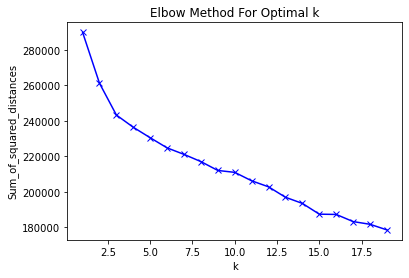

In [335]:
#prepare old testament data for clustering
X2 = oldtest_norm

#use elbow method to optimize number of clusters
Sum_of_squared_distances2 = []
K2 = range(1,20)
for k in K2:
    km = KMeans(n_clusters=k)
    km = km.fit(X2)
    Sum_of_squared_distances2.append(km.inertia_)
plt.plot(K2, Sum_of_squared_distances2, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [336]:
#run pca on old testament data for dimensionality reduction
pca2 = PCA(n_components=2)
reduced_data2 = pca.fit_transform(X2)

#run kmeans clustering algorithm on old testament data
kmeans2 = KMeans(n_clusters=15, random_state=42).fit(reduced_data2)
clusters2 = pd.DataFrame(index=oldtest_norm.index, data=kmeans2.labels_, columns=['Category'])
clusters2

,Category
BookOfProverb_Ch1,3
BookOfProverb_Ch2,1
BookOfProverb_Ch3,10
BookOfProverb_Ch4,10
BookOfProverb_Ch5,13
...,...
BookOfWisdom_Ch15,4
BookOfWisdom_Ch16,5
BookOfWisdom_Ch17,9
BookOfWisdom_Ch18,11


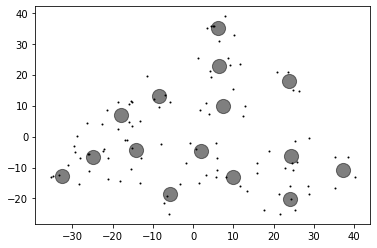

In [337]:
#plot old testament chapters and clusters
centers2 = kmeans2.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1], c='black', s=200, alpha=0.5)
plt.plot(reduced_data2[:, 0], reduced_data2[:, 1], 'k.', markersize=2)
plt.show()

In [388]:
#clean data set by dropping words of length 1 and the word nt
#this is because the data was likely split on all punctuation, including apostrophes
#therefore the letter s, which is in the data set, and the letters nt are not actual words and can be removed
words_clean = []
for w in words:
    if len(w) != 1 and w != 'nt':
        words_clean.append(w)
words_clean = np.array(words_clean)
df_clean = df[words_clean]
#remove words that have fewer than 5 instances
#this is because it is unlikely for such rare words to be important in our analysis
df_clean.drop(columns=words_clean[np.where(df_clean.sum().values < 5)], inplace=True)
df_clean['Books'] = df['Books'].values

c:\users\l\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
c:\users\l\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [389]:
df_clean.head()

,hath,feelings,anger,open,rage,looketh,illumination,tell,build,neither,...,needs,well,state,production,developed,regarded,taketh,thoughts,illumines,Books
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Buddhism_Ch1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Buddhism_Ch2
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Buddhism_Ch3
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,2,0,0,0,0,Buddhism_Ch4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Buddhism_Ch5


In [390]:
#fix the order of the columns
cols = df_clean.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_clean = df_clean[cols]

#get new list of words
words_clean = df_clean.columns[1:]

In [391]:
#create new old testament data based on the cleaned data frame
oldtest_temp = df_clean[(df_clean['Books'].str.contains('Proverb|Eccleasiasticus|Wisdom'))]
oldtest_final = oldtest_temp.drop(columns=['Books'])

#remove words that occur zero times in the old testament
oldtest_final = oldtest_final.drop(columns=words_clean[np.where(oldtest_final.sum() == 0)])
oldtest_final.reset_index(drop=True, inplace=True)

In [392]:
oldtest_final.head()

,hath,anger,open,rage,looketh,tell,build,neither,soft,land,...,walketh,business,red,grows,glad,well,state,regarded,taketh,thoughts
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1


In [393]:
#standardize the old testmanet data
oldtest_final_norm = pd.DataFrame()
oldtest_final_words = oldtest_final
for i in range(len(oldtest_final)):
    temp = (oldtest_final_words.iloc[i].values - np.mean(oldtest_final_words.iloc[i].values)) / np.std(oldtest_final_words.iloc[i].values)
    oldtest_final_norm = pd.concat([oldtest_final_norm, pd.DataFrame(temp, index=oldtest_final_words.columns).T])

In [394]:
#add books back to dataframe
oldtest_final_norm['Books'] = oldtest_clean.index

In [395]:
#fix the order of columns
cols = oldtest_final_norm.columns.tolist()
cols = cols[-1:] + cols[:-1]
oldtest_final_norm = oldtest_final_norm[cols]

In [396]:
oldtest_final_norm.head()

,Books,hath,anger,open,rage,looketh,tell,build,neither,soft,...,walketh,business,red,grows,glad,well,state,regarded,taketh,thoughts
0,BookOfProverb_Ch1,-0.199877,-0.199877,-0.199877,-0.199877,-0.199877,-0.199877,-0.199877,-0.199877,-0.199877,...,-0.199877,-0.199877,-0.199877,-0.199877,-0.199877,-0.199877,-0.199877,1.141555,-0.199877,-0.199877
0,BookOfProverb_Ch2,1.696387,-0.193200,-0.193200,-0.193200,-0.193200,-0.193200,-0.193200,1.696387,-0.193200,...,-0.193200,-0.193200,-0.193200,-0.193200,1.696387,-0.193200,-0.193200,-0.193200,-0.193200,-0.193200
0,BookOfProverb_Ch3,4.456197,-0.176919,-0.176919,-0.176919,-0.176919,-0.176919,-0.176919,-0.176919,-0.176919,...,-0.176919,-0.176919,-0.176919,-0.176919,-0.176919,-0.176919,-0.176919,-0.176919,-0.176919,-0.176919
0,BookOfProverb_Ch4,-0.195927,-0.195927,-0.195927,-0.195927,-0.195927,-0.195927,-0.195927,2.572940,-0.195927,...,-0.195927,-0.195927,-0.195927,-0.195927,-0.195927,-0.195927,-0.195927,-0.195927,-0.195927,-0.195927
0,BookOfProverb_Ch5,1.664622,-0.181888,-0.181888,-0.181888,-0.181888,-0.181888,-0.181888,1.664622,-0.181888,...,-0.181888,-0.181888,-0.181888,-0.181888,-0.181888,1.664622,-0.181888,-0.181888,-0.181888,1.664622


In [398]:
#run clustering algorithm on data frame
pca_oldtest = PCA(n_components=2)
reduced_data_oldtest = pca.fit_transform(oldtest_final_norm.drop(columns=['Books']))
kmeans_oldtest = KMeans(n_clusters=15, random_state=42).fit(reduced_data_oldtest)
clusters_oldtest = pd.DataFrame(index=oldtest_final_norm.index, data=kmeans_oldtest.labels_, columns=['Category'])

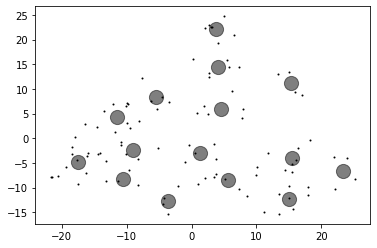

In [399]:
#plot clusters and chapters in the old testament
centers_oldtest = kmeans_oldtest.cluster_centers_
plt.scatter(centers_oldtest[:, 0], centers_oldtest[:, 1], c='black', s=200, alpha=0.5)
plt.plot(reduced_data_oldtest[:, 0], reduced_data_oldtest[:, 1], 'k.', markersize=2)
plt.show()

In [400]:
#create dataframe of coordinates of each book, and its category, for easier visualization
oldtest_coords_clusters = pd.DataFrame([clusters_oldtest.index, [item[0] for item in reduced_data_oldtest], [item[1] for item in reduced_data_oldtest], clusters_oldtest['Category'].values]).T
oldtest_coords_clusters.columns = [['Book', 'x', 'y', 'Category']]

In [401]:
#create new cluster names
cluster_names = []
for i in range(15):
    cluster_names.append('Center of Cluster ' + str(i))

In [402]:
#create dataframe of cluster coordinates for easier visualization
cluster_coords = pd.DataFrame([cluster_names, [item[0] for item in centers_oldtest], [item[1] for item in centers_oldtest]]).T
cluster_coords.columns = [['Category', 'x', 'y']]

In [4]:
#load in old testament dataframe for tone analysis
df = pd.read_csv('oldtest.csv')
df.rename(columns={'Unnamed: 0': 'Book'}, inplace=True)

In [5]:
df.head()

,Book,hath,anger,open,rage,looketh,tell,build,neither,soft,...,walketh,business,red,grows,glad,well,state,regarded,taketh,thoughts
0,BookOfProverb_Ch1,-0.199877,-0.199877,-0.199877,-0.199877,-0.199877,-0.199877,-0.199877,-0.199877,-0.199877,...,-0.199877,-0.199877,-0.199877,-0.199877,-0.199877,-0.199877,-0.199877,1.141555,-0.199877,-0.199877
1,BookOfProverb_Ch2,1.696387,-0.193200,-0.193200,-0.193200,-0.193200,-0.193200,-0.193200,1.696387,-0.193200,...,-0.193200,-0.193200,-0.193200,-0.193200,1.696387,-0.193200,-0.193200,-0.193200,-0.193200,-0.193200
2,BookOfProverb_Ch3,4.456197,-0.176919,-0.176919,-0.176919,-0.176919,-0.176919,-0.176919,-0.176919,-0.176919,...,-0.176919,-0.176919,-0.176919,-0.176919,-0.176919,-0.176919,-0.176919,-0.176919,-0.176919,-0.176919
3,BookOfProverb_Ch4,-0.195927,-0.195927,-0.195927,-0.195927,-0.195927,-0.195927,-0.195927,2.572940,-0.195927,...,-0.195927,-0.195927,-0.195927,-0.195927,-0.195927,-0.195927,-0.195927,-0.195927,-0.195927,-0.195927
4,BookOfProverb_Ch5,1.664622,-0.181888,-0.181888,-0.181888,-0.181888,-0.181888,-0.181888,1.664622,-0.181888,...,-0.181888,-0.181888,-0.181888,-0.181888,-0.181888,1.664622,-0.181888,-0.181888,-0.181888,1.664622


In [21]:
#initialize ibm watson
authenticator = IAMAuthenticator('5G41D_Li4QuGa-DkQwJD5Dl3CBHzBcV6BTSLwlyHufcQ')
tone_analyzer = ToneAnalyzerV3(
    version='2017-09-21',
    authenticator=authenticator
)

tone_analyzer.set_service_url('https://api.us-south.tone-analyzer.watson.cloud.ibm.com/instances/bf993a7b-7133-4d4e-9977-f6467fc4cc52')

In [12]:
#get list of all words in the books
words = np.array(df.columns[1:])

In [40]:
#run tone analysis on words
tone_lst = []
for i in words:
    tone_analysis = tone_analyzer.tone(
        {'text': i},
        content_type='text/plain'
    ).get_result()
    tone_lst.append((i, tone_analysis['document_tone']['tones']))

In [219]:
#drop words that have no associated tone
#create list of tuples containing word and its associated tone
real_tone_lst = []
for i in tone_lst:
    if len(i[1]) > 0:
            temp_score = 0
            temp_tone = ''
            for j in i[1]:
                if j['score'] > temp_score:
                    temp_score = j['score']
                    temp_tone = j['tone_name']
            real_tone_lst.append((i[0], temp_tone))

In [93]:
#get list of all words that have associated tone
tone_words = []
for i in real_tone_lst:
    tone_words.append(i[0])
tone_words.insert(0, 'Book') #keep book in the words for easier column indexing
tone_words = np.array(tone_words)

In [100]:
#only keep words with an associated tone
df = df[tone_words]

In [101]:
df.head()

,Book,anger,rage,build,neither,let,felt,great,embrace,violent,...,secret,incline,spread,cry,necessity,set,fearful,glad,state,thoughts
0,BookOfProverb_Ch1,-0.199877,-0.199877,-0.199877,-0.199877,5.165852,-0.199877,-0.199877,-0.199877,-0.199877,...,-0.199877,-0.199877,1.141555,-0.199877,-0.199877,-0.199877,-0.199877,-0.199877,-0.199877,-0.199877
1,BookOfProverb_Ch2,-0.193200,-0.193200,-0.193200,1.696387,-0.193200,-0.193200,-0.193200,-0.193200,-0.193200,...,-0.193200,3.585974,-0.193200,-0.193200,-0.193200,-0.193200,-0.193200,1.696387,-0.193200,-0.193200
2,BookOfProverb_Ch3,-0.176919,-0.176919,-0.176919,-0.176919,3.297918,-0.176919,-0.176919,-0.176919,-0.176919,...,-0.176919,-0.176919,-0.176919,-0.176919,-0.176919,-0.176919,-0.176919,-0.176919,-0.176919,-0.176919
3,BookOfProverb_Ch4,-0.195927,-0.195927,-0.195927,2.572940,8.110672,-0.195927,-0.195927,1.188506,-0.195927,...,-0.195927,1.188506,-0.195927,-0.195927,-0.195927,-0.195927,-0.195927,-0.195927,-0.195927,-0.195927
4,BookOfProverb_Ch5,-0.181888,-0.181888,-0.181888,1.664622,9.050663,-0.181888,-0.181888,-0.181888,-0.181888,...,-0.181888,1.664622,-0.181888,-0.181888,-0.181888,-0.181888,-0.181888,-0.181888,-0.181888,1.664622


In [102]:
#get unique tones
tones = []
for i in real_tone_lst:
    tones.append(i[1])
tones = np.array((set(tones)))

In [112]:
#create dictionary containing tones and its values for each book
tone_dct = {'Sadness': np.zeros(len(df)), 'Joy': np.zeros(len(df)), 'Anger': np.zeros(len(df)), 'Analytical': np.zeros(len(df)), 'Tentative': np.zeros(len(df)), 'Confident': np.zeros(len(df)), 'Fear': np.zeros(len(df))}
for i in real_tone_lst:
    word = i[0]
    tone = i[1]
    tone_dct[tone] += df[word].values

In [114]:
#add columns of tone values
df['SADNESS'] = tone_dct['Sadness']
df['JOY'] = tone_dct['Joy']
df['ANGER'] = tone_dct['Anger']
df['ANALYTICAL'] = tone_dct['Analytical']
df['TENTATIVE'] = tone_dct['Tentative']
df['CONFIDENT'] = tone_dct['Confident']
df['FEAR'] = tone_dct['Fear']

c:\users\l\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\l\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\l\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [256]:
#create pandas series for each book and its total tone
prov_tone = df[df['Book'].str.contains('Proverb')][['SADNESS', 'ANGER', 'JOY', 'ANALYTICAL', 'TENTATIVE', 'CONFIDENT', 'FEAR']].sum()
eccl_tone = df[df['Book'].str.contains('Eccleasiasticus')][['SADNESS', 'ANGER', 'JOY', 'ANALYTICAL', 'TENTATIVE', 'CONFIDENT', 'FEAR']].sum()
wis_tone = df[df['Book'].str.contains('Wisdom')][['SADNESS', 'ANGER', 'JOY', 'ANALYTICAL', 'TENTATIVE', 'CONFIDENT', 'FEAR']].sum()

In [262]:
#function to normalize data on scale from 0 to 1
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [267]:
#normalize data
prov_tone = NormalizeData(prov_tone.values)
eccl_tone = NormalizeData(eccl_tone.values)
wis_tone = NormalizeData(wis_tone.values)

In [280]:
#turn series into dataframes
prov_df = pd.DataFrame(prov_tone).T
prov_df.columns = ['Sadness', 'Anger', 'Joy', 'Analytical', 'Tentative', 'Confident', 'Fear']

eccl_df = pd.DataFrame(eccl_tone).T
eccl_df.columns = ['Sadness', 'Anger', 'Joy', 'Analytical', 'Tentative', 'Confident', 'Fear']

wis_df = pd.DataFrame(wis_tone).T
wis_df.columns = ['Sadness', 'Anger', 'Joy', 'Analytical', 'Tentative', 'Confident', 'Fear']

In [404]:
prov_df

,Sadness,Anger,Joy,Analytical,Tentative,Confident,Fear
0,0.599071,0.690424,1.0,0.0,0.521823,0.488139,0.51443


In [405]:
eccl_df

,Sadness,Anger,Joy,Analytical,Tentative,Confident,Fear
0,0.516486,0.550526,1.0,0.0,0.540251,0.552315,0.548456


In [406]:
wis_df

,Sadness,Anger,Joy,Analytical,Tentative,Confident,Fear
0,0.266508,0.342749,1.0,0.0,0.557436,0.307545,0.307791


In [281]:
#combines all dataframes into one
all_df = pd.concat([prov_df, eccl_df, wis_df])

In [283]:
#keep track of which book is which
all_df['Books'] = ['Proverbs', 'Eccleasiasticus', 'Wisdom']

In [407]:
all_df

,Sadness,Anger,Joy,Analytical,Tentative,Confident,Fear,Books
0,0.599071,0.690424,1.0,0.0,0.521823,0.488139,0.514430,Proverbs
0,0.516486,0.550526,1.0,0.0,0.540251,0.552315,0.548456,Eccleasiasticus
0,0.266508,0.342749,1.0,0.0,0.557436,0.307545,0.307791,Wisdom


This section is an attempt at linear regression on tone values. The tone values are too scattered for a linear regression model to accurately make predictions, as shown by the roughly horizontal regression lines in the graphs

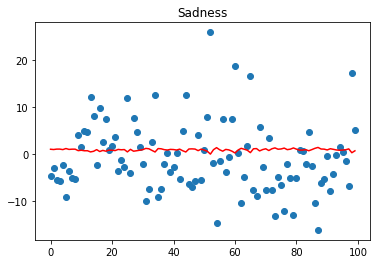

In [197]:
X = np.array(df.index).reshape(-1, 1)
y = df['SADNESS'].values
reg = LinearRegression().fit(X, y)
reg_pred = reg.predict(y.reshape(-1, 1))

plt.scatter(np.array(df.index), df['SADNESS'])
plt.plot(X, reg_pred, color='red')
plt.title('Sadness')
plt.show()

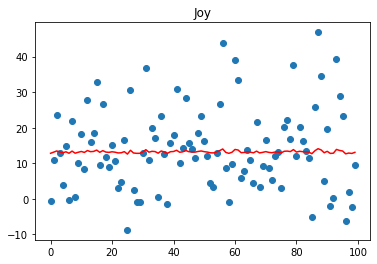

In [198]:
X = np.array(df.index).reshape(-1, 1)
y = df['JOY'].values
reg = LinearRegression().fit(X, y)
reg_pred = reg.predict(y.reshape(-1, 1))

plt.scatter(np.array(df.index), df['JOY'])
plt.plot(X, reg_pred, color='red')
plt.title('Joy')
plt.show()

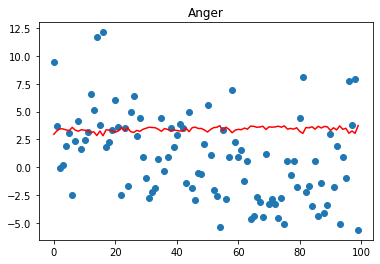

In [199]:
X = np.array(df.index).reshape(-1, 1)
y = df['ANGER'].values
reg = LinearRegression().fit(X, y)
reg_pred = reg.predict(y.reshape(-1, 1))

plt.scatter(np.array(df.index), df['ANGER'])
plt.plot(X, reg_pred, color='red')
plt.title('Anger')
plt.show()

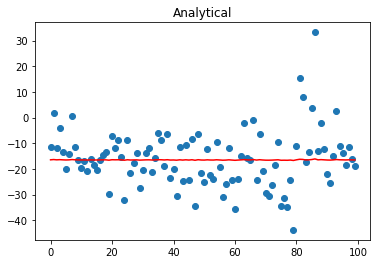

In [200]:
X = np.array(df.index).reshape(-1, 1)
y = df['ANALYTICAL'].values
reg = LinearRegression().fit(X, y)
reg_pred = reg.predict(y.reshape(-1, 1))

plt.scatter(np.array(df.index), df['ANALYTICAL'])
plt.plot(X, reg_pred, color='red')
plt.title('Analytical')
plt.show()

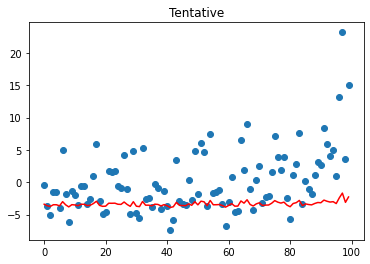

In [202]:
X = np.array(df.index).reshape(-1, 1)
y = df['TENTATIVE'].values
reg = LinearRegression().fit(X, y)
reg_pred = reg.predict(y.reshape(-1, 1))

plt.scatter(np.array(df.index), df['TENTATIVE'])
plt.plot(X, reg_pred, color='red')
plt.title('Tentative')
plt.show()

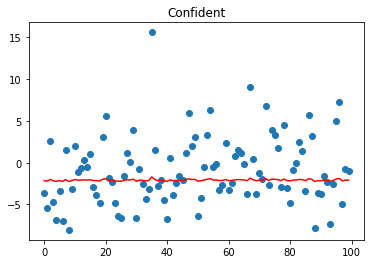

In [205]:
X = np.array(df.index).reshape(-1, 1)
y = df['CONFIDENT'].values
reg = LinearRegression().fit(X, y)
reg_pred = reg.predict(y.reshape(-1, 1))

plt.scatter(np.array(df.index), df['CONFIDENT'])
plt.plot(X, reg_pred, color='red')
plt.title('Confident')
plt.show()

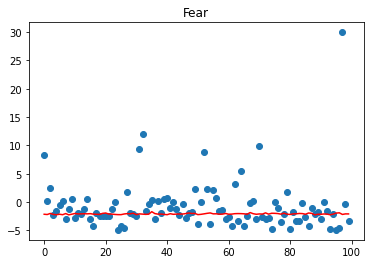

In [206]:
X = np.array(df.index).reshape(-1, 1)
y = df['CONFIDENT'].values
reg = LinearRegression().fit(X, y)
reg_pred = reg.predict(y.reshape(-1, 1))

plt.scatter(np.array(df.index), df['FEAR'])
plt.plot(X, reg_pred, color='red')
plt.title('Fear')
plt.show()